#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


#### Load Dataset

In [6]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


#### Summary Statistics and Missing Data

In [7]:
df.describe()
df.describe(include='object')

missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_df[missing_df['Missing %'] > 0]


,Missing Count,Missing %
Comments,525600,100.0


#### Clean Missing and Outliers

In [8]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[cols] = df[cols].apply(lambda x: x.fillna(x.median()))

z_scores = df[cols].apply(zscore)
outliers = np.abs(z_scores) > 3
df = df[~(outliers.any(axis=1))]

#### Timeseries Analysis

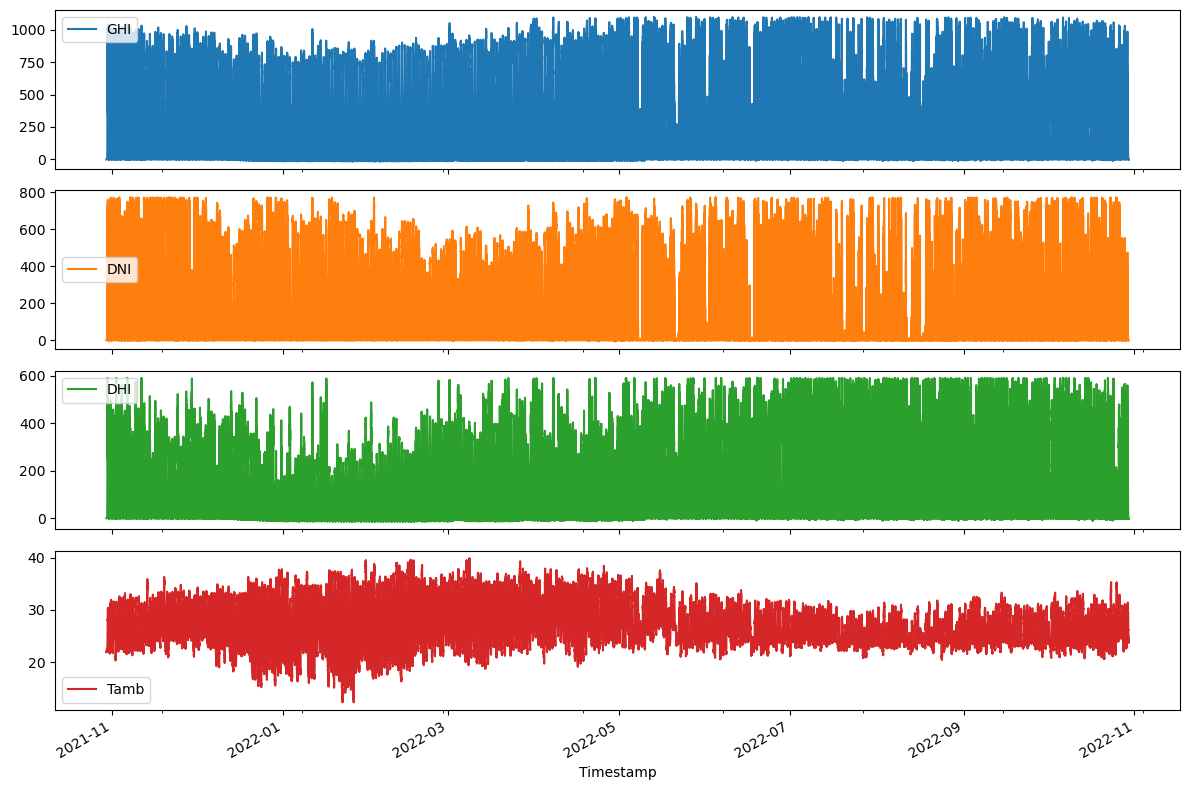

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()


#### Sensor Cleaning Impact

In [ ]:
df['Cleaning'] = df['Cleaning'].fillna(0).astype(int)

print("Pre-clean:", df[df['Cleaning'] == 0][['ModA', 'ModB']].mean())
print()
print("Post-clean:", df[df['Cleaning'] == 1][['ModA', 'ModB']].mean())

Pre-clean: ModA    189.680780
ModB    181.598521
dtype: float64

Post-clean: ModA    273.309252
ModB    277.231102
dtype: float64


#### Correlation and Scatter plots

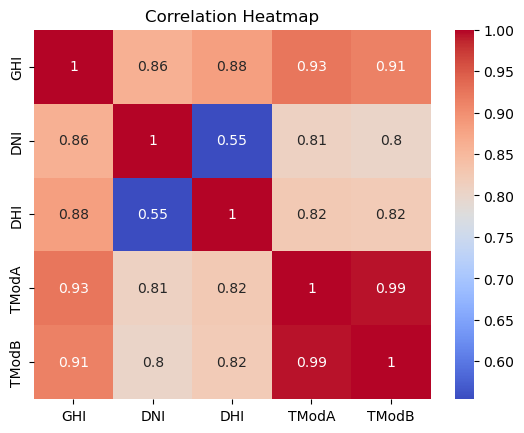

<Axes: xlabel='RH', ylabel='GHI'>

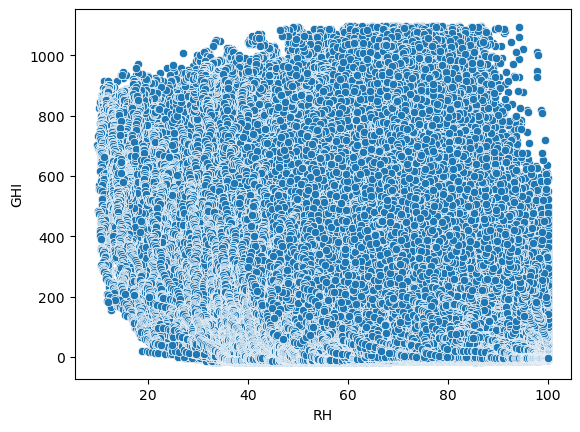

In [12]:
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)


#### Distribution Analysis

<Axes: xlabel='WS', ylabel='Count'>

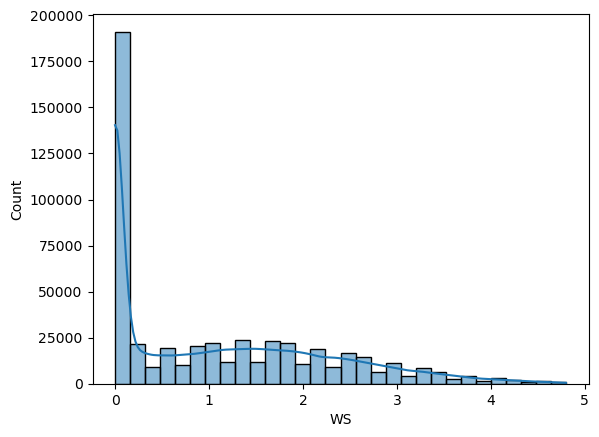

In [13]:
sns.histplot(df['WS'], bins=30, kde=True)

#### Temperature and RH Impact

<Axes: xlabel='RH', ylabel='Tamb'>

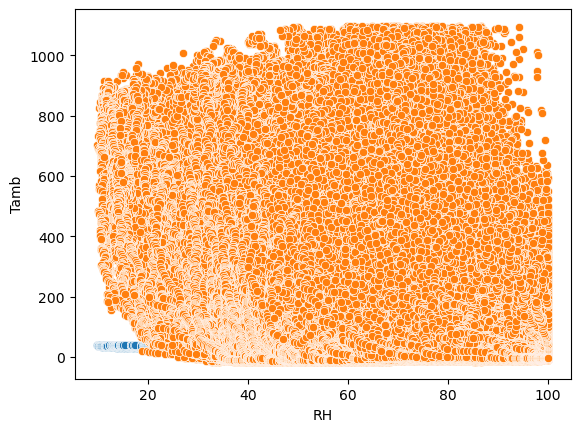

In [14]:
sns.scatterplot(x='RH', y='Tamb', data=df)
sns.scatterplot(x='RH', y='GHI', data=df)

#### Bubble Chart

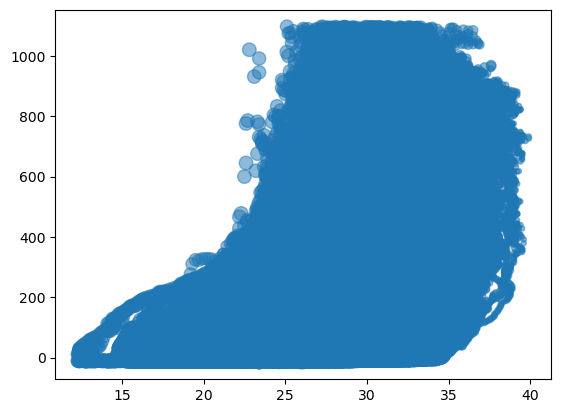

In [15]:
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)

#### Export Cleaned Data

In [16]:
df.to_csv('../data/sierraleone_clean.csv')